In [2]:
# import dependencies
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
from config import api_key
from sklearn import preprocessing

In [3]:
# url for Carbon Dioxide Emissions from Petroleum and Other Liquid Fuels, Annual
pt_url = "http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.PATCCO2.A"

In [4]:
# get the json data
pt_emissions = requests.get(pt_url).json()
print(json.dumps(pt_emissions, indent=4, sort_keys=True))

{
    "request": {
        "command": "series",
        "series_id": "STEO.PATCCO2.A"
    },
    "series": [
        {
            "copyright": "None",
            "data": [
                [
                    "2020",
                    2398.6246
                ],
                [
                    "2019",
                    2382.1237
                ],
                [
                    "2018",
                    2375.61878
                ],
                [
                    "2017",
                    2329.5180543
                ],
                [
                    "2016",
                    2312.6078371
                ],
                [
                    "2015",
                    2289.9803046
                ],
                [
                    "2014",
                    2246.5761322
                ],
                [
                    "2013",
                    2224.3562467
                ],
                [
                    "2012",
    

In [40]:
# collect year and valu from json data
year = []
value = []
units = 'million metric tons'
for x in pt_emissions['series'][0]['data']:
    year.append(x[0])
    value.append(x[1])
    
year = year[::-1]
value = value[::-1]
    
# Loop through to calculate the annual percent change
i = 0
percent_change_petroleum_emissions = []
for z in value:
    if(i == 0):
        percent_change_petroleum_emissions.append(0)
    else:
        percent_change_petroleum_emissions.append( (z - value[i-1])/ value[i-1] * 100)
    i += 1
    
# make a dataframe
pt_emissions_df = pd.DataFrame({"Year": year, "Petroleum Emissions": value, "Units": units, "Petroleum Emissions % Change": percent_change_petroleum_emissions})
pt_emissions_df.head()

,Year,Petroleum Emissions,Units,Petroleum Emissions % Change
0,1990,2186.700788,million metric tons,0.000000
1,1991,2130.855546,million metric tons,-2.553858
2,1992,2174.167907,million metric tons,2.032628
3,1993,2188.232745,million metric tons,0.646907
4,1994,2224.320407,million metric tons,1.649169


In [48]:
# Find minimum and maximum emissions for petroleum and other liquid fuels
min_emissions_value = pt_emissions_df["Petroleum Emissions"].min()
min_emissions_year = int(pt_emissions_df[pt_emissions_df["Petroleum Emissions"]==min_emissions_value].Year)
max_emissions_value = pt_emissions_df["Petroleum Emissions"].max()
max_emissions_year = int(pt_emissions_df[pt_emissions_df["Petroleum Emissions"]==max_emissions_value].Year)

# find the total petroleum and other liquid fuels emissions
total_emissions = pt_emissions_df["Petroleum Emissions"].sum()

# find the difference between most and least petroleum emissions
emissions_change = (max_emissions_value - min_emissions_value)

#find the percentage change from lowest year to highest year
emissions_percent_change = (emissions_change / min_emissions_value) *100

# find the average percent change over time
pt_average_percent_change = pt_emissions_df["Petroleum Emissions % Change"].mean()

# calculate the total percent change

total_emissions_percent_change = (pt_emissions_df['Petroleum Emissions'].iloc[-1] - pt_emissions_df['Petroleum Emissions'].iloc[0]) / pt_emissions_df['Petroleum Emissions'].iloc[0]

total_emissions_percent_change = total_emissions_percent_change * 100

print(f"{int(min_emissions_year)} had the least amount of emissions from petroleum and other liquid fuels with {min_emissions_value} million meric tons.")
print(f"{int(max_emissions_year)} has the most amount of emissions from petroleum and other liquid fuels with {max_emissions_value} million meric tons.")
print(f"The total emissions from petroleum and other liquid fuels is {total_emissions} million metric tons.")
print(f"The difference in petroleum emissions from 1990 and 2020 is {emissions_change} million metric tons.")
print(f"The percentage change in petroleum emissions from the lowest year to highest year is {emissions_percent_change}%")
print(f"The average percent change of peroleum emissions year to year is {pt_average_percent_change}%")
print(f"The percent change of peroleum emissions from 1990 to 2020 is {total_emissions_percent_change}%")

1991 had the least amount of emissions from petroleum and other liquid fuels with 2130.8555465 million meric tons.
2005 has the most amount of emissions from petroleum and other liquid fuels with 2622.7226458 million meric tons.
The total emissions from petroleum and other liquid fuels is 72840.92544339999 million metric tons.
The difference in petroleum emissions from 1990 and 2020 is 491.86709930000006 million metric tons.
The percentage change in petroleum emissions from the lowest year to highest year is 23.083080413775956%
The average percent change of peroleum emissions year to year is 0.3261199552296724%
The percent change of peroleum emissions from 1990 to 2020 is 9.6914865303956%


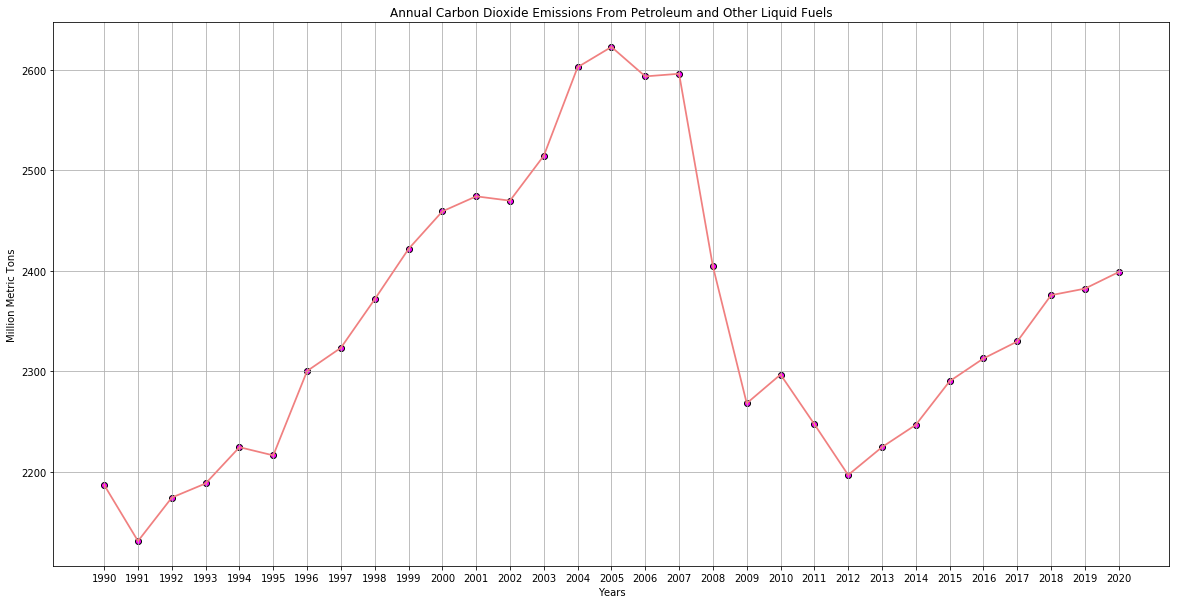

In [7]:
# Set the size of the figure to fit 30 years of data
plt.figure(figsize=(20,10))
# Create a visual for the data
plt.scatter(year, pt_emissions_df['Petroleum Emissions'], color="magenta", edgecolors="black")
plt.plot(year, pt_emissions_df['Petroleum Emissions'], color="lightcoral", linewidth=1.75)
plt.title("Annual Carbon Dioxide Emissions From Petroleum and Other Liquid Fuels")
plt.ylabel("Million Metric Tons")
plt.xlabel("Years")
plt.grid(True)

# Save Figure
plt.savefig("output/petroleum_emissions.png")

# display the figure
plt.show()

In [8]:
# url for annual carbon dioxide emissions from natural gas
ng_url = "http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.NGTCCO2.A"

In [9]:
# get the json data
ng_emissions = requests.get(ng_url).json()
print(json.dumps(ng_emissions, indent=4, sort_keys=True))

{
    "request": {
        "command": "series",
        "series_id": "STEO.NGTCCO2.A"
    },
    "series": [
        {
            "copyright": "None",
            "data": [
                [
                    "2020",
                    1661.8332
                ],
                [
                    "2019",
                    1636.8881
                ],
                [
                    "2018",
                    1617.6484134
                ],
                [
                    "2017",
                    1473.9347923
                ],
                [
                    "2016",
                    1493.9813327
                ],
                [
                    "2015",
                    1482.9839654
                ],
                [
                    "2014",
                    1439.5261164
                ],
                [
                    "2013",
                    1409.35395
                ],
                [
                    "2012",
    

In [52]:
# collect year and value from json data
ng_year = []
ng_value = []
for x in ng_emissions['series'][0]['data']:
    ng_year.append(x[0])
    ng_value.append(x[1])
    
ng_year = ng_year[::-1]
ng_value = ng_value[::-1]
    
# Loop through to calculate the annual percent change
i = 0
percent_change_natural_gas_emissions = []
for z in ng_value:
    if(i == 0):
        percent_change_natural_gas_emissions.append(0)
    else:
        percent_change_natural_gas_emissions.append( (z - ng_value[i-1])/ ng_value[i-1] * 100)
    i += 1
    
# make a dataframe
ng_emissions_df = pd.DataFrame({"Year": ng_year, "Natural Gas Emissions": ng_value, "Units": units, "Natural Gas Emissions % Change": percent_change_natural_gas_emissions})

ng_emissions_df.head()

,Year,Natural Gas Emissions,Units,Natural Gas Emissions % Change
0,1990,1026.437147,million metric tons,0.000000
1,1991,1046.891748,million metric tons,1.992777
2,1992,1082.051111,million metric tons,3.358453
3,1993,1111.331036,million metric tons,2.705965
4,1994,1134.337221,million metric tons,2.070147


In [50]:
# Find minimum and maximum natural gas emissions
ng_min_emissions_value = ng_emissions_df["Natural Gas Emissions"].min()
ng_min_emissions_year = int(ng_emissions_df[ng_emissions_df["Natural Gas Emissions"]==ng_min_emissions_value].Year)
ng_max_emissions_value = ng_emissions_df["Natural Gas Emissions"].max()
ng_max_emissions_year = int(ng_emissions_df[ng_emissions_df["Natural Gas Emissions"]==ng_max_emissions_value].Year)

# find the total natural gas emissions
ng_total_emissions = ng_emissions_df["Natural Gas Emissions"].sum()

# find the difference between most and least emissions
ng_emissions_change = (ng_max_emissions_value - ng_min_emissions_value)

#find the percentage change from lowest year to highest year
ng_emissions_percent_change = (ng_emissions_change / ng_min_emissions_value) *100

# find the average percent change over time
ng_average_percent_change = ng_emissions_df["Natural Gas Emissions % Change"].mean()

# find the total percent change
total_ng_emissions_percent_change = (ng_emissions_df['Natural Gas Emissions'].iloc[-1] - ng_emissions_df['Natural Gas Emissions'].iloc[0]) / ng_emissions_df['Natural Gas Emissions'].iloc[0]

total_ng_emissions_percent_change = total_ng_emissions_percent_change * 100

print(f"{int(ng_min_emissions_year)} had the least amount of emissions from natural gas with {ng_min_emissions_value} million meric tons.")
print(f"{int(ng_max_emissions_year)} is projected to have the most amount of emissions from natural gas with {ng_max_emissions_value} million meric tons.")
print(f"The total emissions from natural gas is {ng_total_emissions} million metric tons.")
print(f"The difference in natural gas emissions from 1990 and 2020 is {ng_emissions_change} million metric tons.")
print(f"The percentage change in natural gas from the lowest year to highest year is {ng_emissions_percent_change}%")
print(f"The average percent change of natural gas emissions year to year is {ng_average_percent_change}%")
print(f"The percent change of natural gas emissions from 1990 to 2020 is {total_ng_emissions_percent_change}%")

1990 had the least amount of emissions from natural gas with 1026.437147 million meric tons.
2020 is projected to have the most amount of emissions from natural gas with 1661.8332 million meric tons.
The total emissions from natural gas is 39700.4674519 million metric tons.
The difference in natural gas emissions from 1990 and 2020 is 635.3960529999999 million metric tons.
The percentage change in natural gas from the lowest year to highest year is 61.90306487417099%
The average percent change of natural gas emissions year to year is 1.6048836186093003%
The percent change of natural gas emissions from 1990 to 2020 is 61.90306487417099%


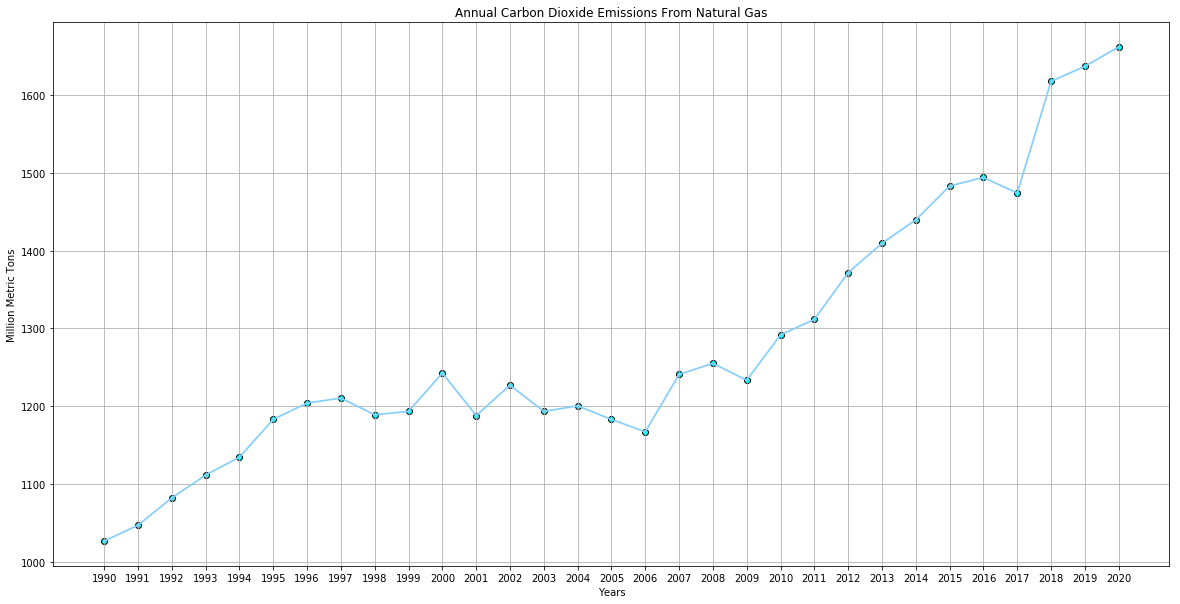

In [12]:
# Set the size of the figure to fit 30 years of data
plt.figure(figsize=(20,10))
# Create a visual for the data
plt.scatter(year, ng_emissions_df["Natural Gas Emissions"], color="cyan", edgecolors="black")
plt.plot(year, ng_emissions_df["Natural Gas Emissions"], color="lightskyblue", linewidth=1.75)
plt.title("Annual Carbon Dioxide Emissions From Natural Gas")
plt.ylabel("Million Metric Tons")
plt.xlabel("Years")
plt.grid(True)

# Save Figure
plt.savefig("output/natural_gas_emissions.png")

# display the figure
plt.show()

In [13]:
# url for annual carbon dioxide emissions from coal
c_url = "http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.CXTCCO2.A"

In [14]:
# get the json data
c_emissions = requests.get(c_url).json()
print(json.dumps(c_emissions, indent=4, sort_keys=True))

{
    "request": {
        "command": "series",
        "series_id": "STEO.CXTCCO2.A"
    },
    "series": [
        {
            "copyright": "None",
            "data": [
                [
                    "2020",
                    1109.92365
                ],
                [
                    "2019",
                    1177.27296
                ],
                [
                    "2018",
                    1269.4403272
                ],
                [
                    "2017",
                    1315.9754204
                ],
                [
                    "2016",
                    1354.1614478
                ],
                [
                    "2015",
                    1480.3240226
                ],
                [
                    "2014",
                    1713.5413644
                ],
                [
                    "2013",
                    1717.8293899
                ],
                [
                    "2012",


In [42]:
# collect year and value from json data
c_year = []
c_value = []
for x in c_emissions['series'][0]['data']:
    c_year.append(x[0])
    c_value.append(x[1])

c_year = c_year[::-1]
c_value = c_value[::-1]
    
# Loop through to calculate the annual percent change
i = 0
percent_change_coal_emissions = []
for z in c_value:
    if(i == 0):
        percent_change_coal_emissions.append(0)
    else:
        percent_change_coal_emissions.append( (z - c_value[i-1])/ c_value[i-1] * 100)
    i += 1

    
# make a dataframe
c_emissions_df = pd.DataFrame({"Year": c_year, "Coal Emissions": c_value, "Units": units, "Coal Emissions % Change": percent_change_coal_emissions})

c_emissions_df.head()

,Year,Coal Emissions,Units,Coal Emissions % Change
0,1990,1821.405280,million metric tons,0.000000
1,1991,1807.258386,million metric tons,-0.776702
2,1992,1821.922801,million metric tons,0.811418
3,1993,1882.415567,million metric tons,3.320271
4,1994,1893.239832,million metric tons,0.575020


In [53]:
# Find minimum and maximum coal emissions
c_min_emissions_value = c_emissions_df["Coal Emissions"].min()
c_min_emissions_year = int(c_emissions_df[c_emissions_df["Coal Emissions"]==c_min_emissions_value].Year)
c_max_emissions_value = c_emissions_df["Coal Emissions"].max()
c_max_emissions_year = int(c_emissions_df[c_emissions_df["Coal Emissions"]==c_max_emissions_value].Year)

# find the total natural gas emissions
c_total_emissions = c_emissions_df["Coal Emissions"].sum()

# find the difference between most and least emissions
c_emissions_change = (c_max_emissions_value - c_min_emissions_value)

#find the percentage change from lowest year to highest year
c_emissions_percent_change = (c_emissions_change / c_min_emissions_value) *100

# find the average percent change over time
c_average_percent_change = c_emissions_df["Coal Emissions % Change"].mean()

# find the total percent change
total_c_emissions_percent_change = (c_emissions_df['Coal Emissions'].iloc[-1] - c_emissions_df['Coal Emissions'].iloc[0]) / c_emissions_df['Coal Emissions'].iloc[0]

total_c_emissions_percent_change = total_c_emissions_percent_change * 100

print(f"{c_min_emissions_year} had the least amount of emissions from coal with {c_min_emissions_value} million meric tons.")
print(f"{int(c_max_emissions_year)} has the most amount of emissions from coal with {c_max_emissions_value} million meric tons.")
print(f"The total emissions from coal is {c_total_emissions} million metric tons.")
print(f"The difference in coal emissions from 2020 and 2005 is {c_emissions_change} million metric tons.")
print(f"The percentage change in coal from the lowest year to highest year is {c_emissions_percent_change}%")
print(f"The average percent change of coal emissions year to year is {c_average_percent_change}%")
print(f"The percent change of coal emissions from 1990 to 2020 is {total_c_emissions_percent_change}%")

2020 had the least amount of emissions from coal with 1109.92365 million meric tons.
2005 has the most amount of emissions from coal with 2181.8967085 million meric tons.
The total emissions from coal is 57109.25365179998 million metric tons.
The difference in coal emissions from 2020 and 2005 is 1071.9730585 million metric tons.
The percentage change in coal from the lowest year to highest year is 96.58079260677074%
The average percent change of coal emissions year to year is -1.4585514307554013%
The percent change of coal emissions from 1990 to 2020 is -39.062236068830934%


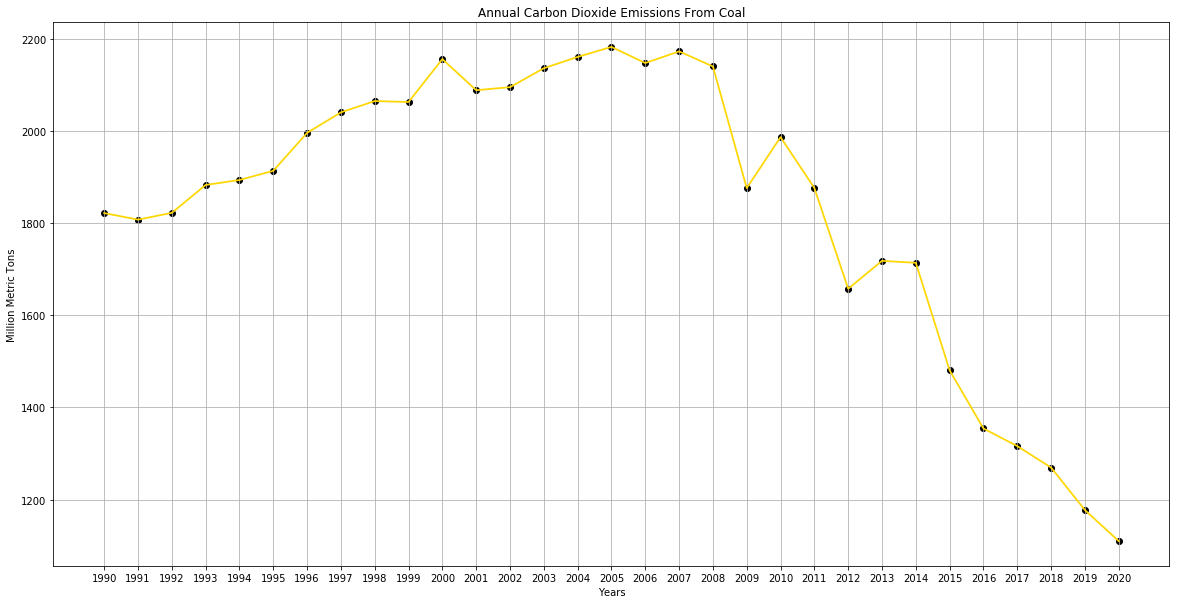

In [17]:
# Set the size of the figure to fit 30 years of data
plt.figure(figsize=(20,10))
# Create a visual for the data
plt.scatter(year, c_emissions_df["Coal Emissions"], color="black", edgecolors="black")
plt.plot(year, c_emissions_df["Coal Emissions"], color="gold", linewidth=1.75)
plt.title("Annual Carbon Dioxide Emissions From Coal")
plt.ylabel("Million Metric Tons")
plt.xlabel("Years")
plt.grid(True)

# Save Figure
plt.savefig("output/coal_emissions.png")

# display the figure
plt.show()

In [18]:
# url for annual total energy carbon dioxide emissions
cd_url = "http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.TETCCO2.A"

In [19]:
# get the json data
cd_emissions = requests.get(cd_url).json()
print(json.dumps(cd_emissions, indent=4, sort_keys=True))

{
    "request": {
        "command": "series",
        "series_id": "STEO.TETCCO2.A"
    },
    "series": [
        {
            "copyright": "None",
            "data": [
                [
                    "2020",
                    5182.0311
                ],
                [
                    "2019",
                    5207.9345
                ],
                [
                    "2018",
                    5274.3572906
                ],
                [
                    "2017",
                    5131.0780938
                ],
                [
                    "2016",
                    5172.400445
                ],
                [
                    "2015",
                    5264.7765886
                ],
                [
                    "2014",
                    5411.1928133
                ],
                [
                    "2013",
                    5363.0191015
                ],
                [
                    "2012",
   

In [44]:
# collect year and value from json data
cd_year = []
cd_value = []
for x in cd_emissions['series'][0]['data']:
    cd_year.append(x[0])
    cd_value.append(x[1])

cd_year = cd_year[::-1]
cd_value = cd_value[::-1]
    
# Loop through to calculate the annual percent change
i = 0
percent_change_cd_emissions = []
for z in cd_value:
    if(i == 0):
        percent_change_cd_emissions.append(0)
    else:
        percent_change_cd_emissions.append( (z - cd_value[i-1])/ cd_value[i-1] * 100)
    i += 1
    
# make a dataframe
cd_emissions_df = pd.DataFrame({"Year": cd_year, "Total Energy Co2 Emissions": cd_value, "Units": units, "Total Carbon Emissions % Change": percent_change_cd_emissions})

cd_emissions_df.head()

,Year,Total Energy Co2 Emissions,Units,Total Carbon Emissions % Change
0,1990,5038.299519,million metric tons,0.000000
1,1991,4992.610587,million metric tons,-0.906832
2,1992,5087.018514,million metric tons,1.890953
3,1993,5183.562357,million metric tons,1.897847
4,1994,5261.604227,million metric tons,1.505564


In [55]:
# Find minimum and maximum total  emissions
cd_min_emissions_value = cd_emissions_df["Total Energy Co2 Emissions"].min()
cd_min_emissions_year = int(cd_emissions_df[cd_emissions_df["Total Energy Co2 Emissions"]==cd_min_emissions_value].Year)
cd_max_emissions_value = cd_emissions_df["Total Energy Co2 Emissions"].max()
cd_max_emissions_year = int(cd_emissions_df[cd_emissions_df["Total Energy Co2 Emissions"]==cd_max_emissions_value].Year)

# find the total natural gas emissions
cd_total_emissions = cd_emissions_df["Total Energy Co2 Emissions"].sum()

# find the difference between most and least emissions
cd_emissions_change = (cd_max_emissions_value - cd_min_emissions_value)

#find the percentage change from lowest year to highest year
cd_emissions_percent_change = (cd_emissions_change / cd_min_emissions_value) *100

# find the average percent change over time
cd_average_percent_change = cd_emissions_df["Total Carbon Emissions % Change"].mean()

# find the total percent change
total_cd_emissions_percent_change = (cd_emissions_df['Total Energy Co2 Emissions'].iloc[-1] - cd_emissions_df['Total Energy Co2 Emissions'].iloc[0]) / cd_emissions_df['Total Energy Co2 Emissions'].iloc[0]

total_cd_emissions_percent_change = total_cd_emissions_percent_change * 100

print(f"{cd_min_emissions_year} had the least amount of total energy carbon emissions with {cd_min_emissions_value} million meric tons.")
print(f"{int(cd_max_emissions_year)} has the most amount of total energy carbon emissions with {cd_max_emissions_value} million meric tons.")
print(f"The total energy carbon emissions is {cd_total_emissions} million metric tons.")
print(f"The difference in total energy carbon emissions from 1991 and 2007 is {cd_emissions_change} million metric tons.")
print(f"The percentage change in coal from the lowest year to highest year is {cd_emissions_percent_change}%")
print(f"The average percent change of total carbon emissions year to year is {cd_average_percent_change}%")
print(f"The percent change of total carbon emissions from 1990 to 2020 is {total_cd_emissions_percent_change}%")

1991 had the least amount of total energy carbon emissions with 4992.6105868 million meric tons.
2007 has the most amount of total energy carbon emissions with 6020.6110693 million meric tons.
The total energy carbon emissions is 169979.0264961 million metric tons.
The difference in total energy carbon emissions from 1991 and 2007 is 1028.0004824999996 million metric tons.
The percentage change in coal from the lowest year to highest year is 20.590439903683606%
The average percent change of total carbon emissions year to year is 0.11979624203734189%
The percent change of total carbon emissions from 1990 to 2020 is 2.852779602680862%


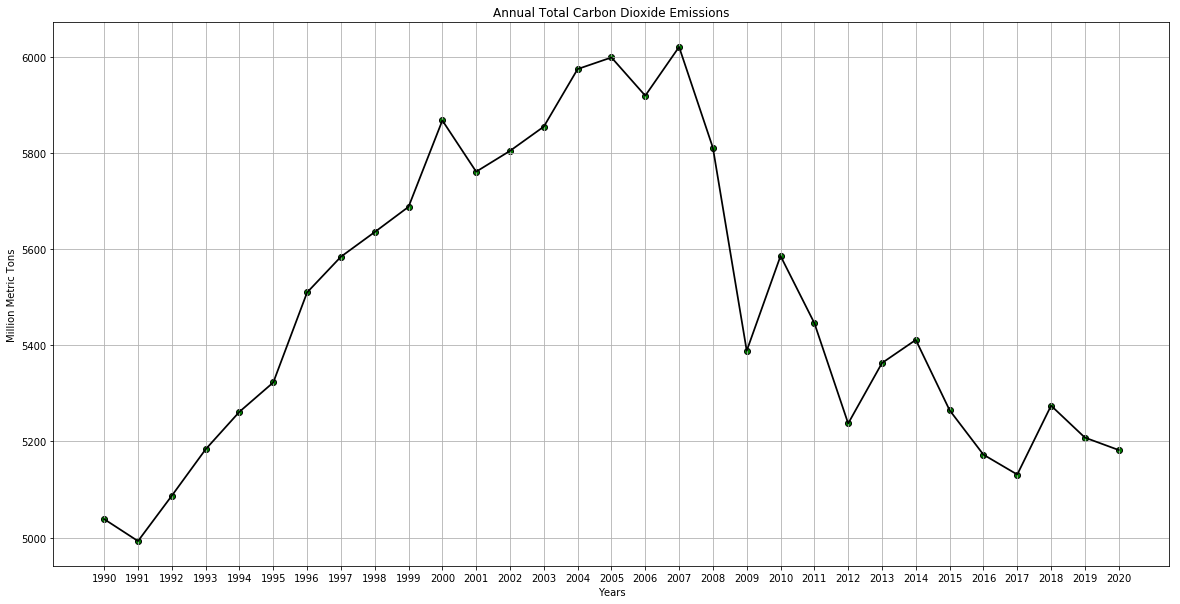

In [22]:
# Set the size of the figure to fit 30 years of data
plt.figure(figsize=(20,10))
# Create a visual for the data
plt.scatter(year, cd_value, color="green", edgecolors="black")
plt.plot(year, cd_value, color="black", linewidth=1.75)
plt.title("Annual Total Carbon Dioxide Emissions")
plt.ylabel("Million Metric Tons")
plt.xlabel("Years")
plt.grid(True)

# Save Figure
plt.savefig("output/total_emissions.png")

# display the figure
plt.show()

In [23]:
# merge the dataframes

df_merge1 = pd.merge(ng_emissions_df, pt_emissions_df, on='Year' , how='inner')

df_merge2 = pd.merge(df_merge1 , c_emissions_df, on='Year' , how='inner')

emissions_df = pd.merge(df_merge2 , cd_emissions_df , on='Year' , how='inner')

emissions_df = emissions_df.drop(["Units_x", "Units_y"], axis=1)
emissions_df['Units'] = 'million metric tons'

# save dataframe as csv file
emissions_df.to_csv("resources/carbon_emissions.csv", index=True, header=True)

emissions_df.head()

,Year,Natural Gas Emissions,Natural Gas Emissions % Change,Petroleum Emissions,Petroleum Emissions % Change,Coal Emissions,Coal Emissions % Change,Total Energy Co2 Emissions,Total Carbon Emissions % Change,Units
0,1990,1026.437147,0.000000,2186.700788,0.000000,1821.405280,0.000000,5038.299519,0.000000,million metric tons
1,1991,1046.891748,1.992777,2130.855546,-2.553858,1807.258386,-0.776702,4992.610587,-0.906832,million metric tons
2,1992,1082.051111,3.358453,2174.167907,2.032628,1821.922801,0.811418,5087.018514,1.890953,million metric tons
3,1993,1111.331036,2.705965,2188.232745,0.646907,1882.415567,3.320271,5183.562357,1.897847,million metric tons
4,1994,1134.337221,2.070147,2224.320407,1.649169,1893.239832,0.575020,5261.604227,1.505564,million metric tons


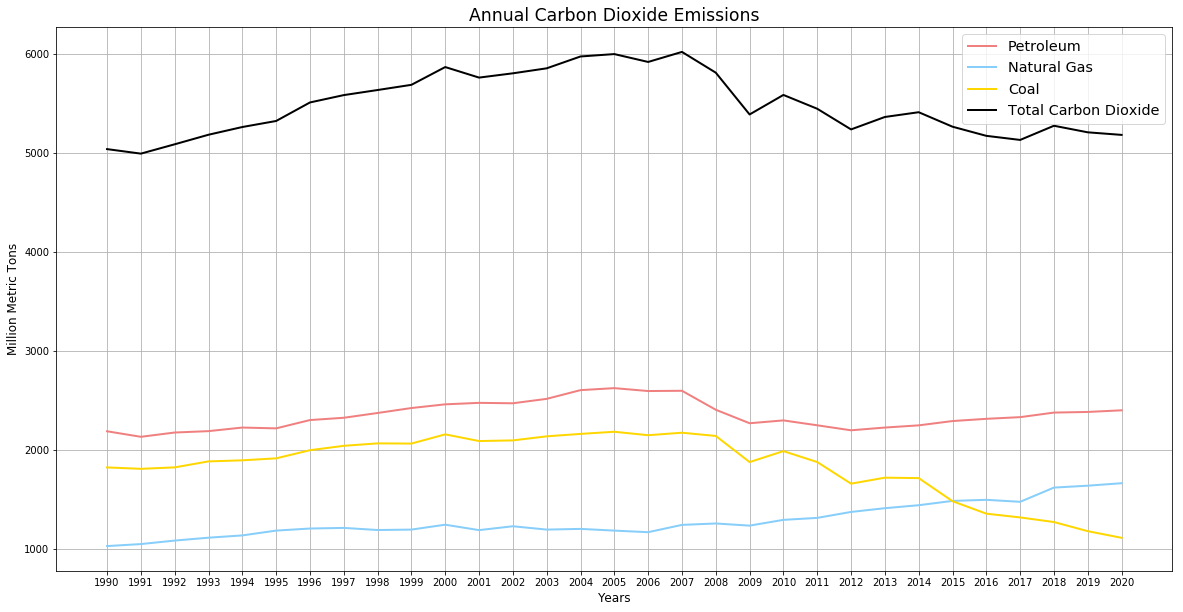

In [24]:
# US Carbon Dioxide Emissions
plt.figure(figsize=(20,10))

# # Create a visual for the combined data
plt.plot(year, value, label="Petroleum", color="lightcoral", linewidth=2.0)
plt.plot(year, ng_value, label="Natural Gas", color ="lightskyblue", linewidth=2.0)
plt.plot(year, c_value, label="Coal", color="gold", linewidth=2.0)
plt.plot(year, cd_value, label="Total Carbon Dioxide", color="black", linewidth=2.0)
plt.title("Annual Carbon Dioxide Emissions", fontsize="xx-large")
plt.ylabel("Million Metric Tons", fontsize="large")
plt.xlabel("Years", fontsize="large")
plt.legend(loc='best', frameon=True, fancybox=True, fontsize="x-large")
plt.grid(True)

# Save Figure
plt.savefig("output/carbpn_dioxide_emissions.png")

# Display the figure
plt.show()

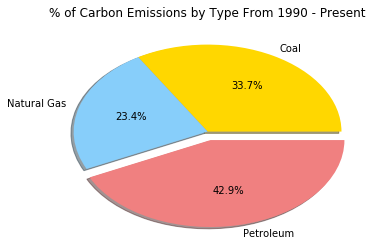

In [25]:
# Get total emissions by type
total_emissions_per_type = (c_total_emissions + ng_total_emissions + total_emissions)

# Build Pie Chart
sizes = [((c_total_emissions / total_emissions_per_type) * 100) , ((ng_total_emissions / total_emissions_per_type) * 100) , ((total_emissions / total_emissions_per_type) * 100)]
labels = ["Coal" , "Natural Gas" , "Petroleum"]
colors = ["gold" , "lightskyblue" , "lightcoral"]
explode = [0,0,0.1]

plt.pie(sizes , labels = labels , explode =explode, colors = colors , shadow = True , autopct="%1.1f%%")
plt.title('% of Carbon Emissions by Type From 1990 - Present')

# Save Figure
plt.savefig("output/emissions_pie.png")

plt.show()


In [26]:
# Compare carbon emissions to fossil fuel consumption

# Total Petroleum and Other Liquids Product Supplied, Annual
petroleum_url = "http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.PATCPUSX.A"

# get the data
response = requests.get(petroleum_url).json()

# Create lists to determine x and y axis for graphs
years = []
petroleum_consumption = []

# Loop through Petroleum & Other Liquids API to call data being measured
for x in response["series"][0]["data"]:
    years.append(x[0])
    petroleum_consumption.append(x[1])
    
#values = response["series"][0]["data"][1]
years  = years[::-1]
petroleum = petroleum_consumption[::-1]

# Create DataFrame
petroleum_consumption_mmbpd_df = pd.DataFrame({
    'Year': years[0:31],
    'Oil (mmbpd)': petroleum_consumption[0:31]
})
#petroleum_consumption_mmbpd_df.set_index("Year").head()

print(json.dumps(response, indent=4, sort_keys=True))

{
    "request": {
        "command": "series",
        "series_id": "STEO.PATCPUSX.A"
    },
    "series": [
        {
            "copyright": "None",
            "data": [
                [
                    "2020",
                    21.037267486
                ],
                [
                    "2019",
                    20.816958556
                ],
                [
                    "2018",
                    20.474823485
                ],
                [
                    "2017",
                    19.957716775
                ],
                [
                    "2016",
                    19.687234932
                ],
                [
                    "2015",
                    19.533503173
                ],
                [
                    "2014",
                    19.100073868
                ],
                [
                    "2013",
                    18.966859773
                ],
                [
                    "20

In [27]:
# US Natural Gas Consumption, Annual
natural_gas_url = "http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.NGTCPUS.A"

# get the data
response = requests.get(natural_gas_url).json()

# US Natural Gas Consumption, Annual
# Create lists to determine x and y axis for graphs
years = []
natural_gas_consumption = []

# Loop through Natural Gas API to call data being measured
for x in response["series"][0]["data"]:
    years.append(x[0])
    natural_gas_consumption.append(x[1])
    
#values = response["series"][0]["data"][1]
years  = years[::-1]
natural_gas = natural_gas_consumption[::-1]

# create dataframe
ng_consumption_bcf_df = pd.DataFrame({
    'Year': years[0:31],
    'NG (bcf/day)': natural_gas_consumption[0:31]
})
ng_consumption_bcf_df.set_index("Year").head()

,NG (bcf/day)
Year,
1990,83.564262
1991,82.531238
1992,81.681260
1993,74.317060
1994,74.984129


In [28]:
# US Total Coal Supply, Annual
coal_url = "http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.CLTSPUS_TON.A"

# get the data
response = requests.get(coal_url).json()

# US Total Coal Supply, Annual
# Create lists to determine x and y axis for graphs
years = []
coal_supply = []

# Loop through Natural Gas API to call data being measured
for x in response["series"][0]["data"]:
    years.append(x[0])
    coal_supply.append(x[1])
    
#values = response["series"][0]["data"][1]
years  = years[::-1]
coal = coal_supply[::-1]

# make dataframe
coal_consumption_mst_df = pd.DataFrame({
    'Year': years[0:31],
    'coal (MMSt)': coal_supply[0:31]
})
coal_consumption_mst_df.set_index("Year").head()

,coal (MMSt)
Year,
1990,599.214620
1991,632.670612
1992,687.697499
1993,721.417976
1994,733.519456


In [29]:
# Create Combined FossilFuel consumption DataFrame using list of dictionaries method
fossilfuel_consumption_df = pd.DataFrame({
    'Year': years[0:31],
    'Petroleum (mmbpd)': petroleum[0:31],
    'Natural Gas (bcf/day)': natural_gas[0:31],
    'Coal (MMSt)': coal[0:31],
})

# Normalize values for the different types of fossil fuel consumption
x = fossilfuel_consumption_df[['Petroleum (mmbpd)','Natural Gas (bcf/day)', 'Coal (MMSt)', "Year"]].values.astype(float) #returns a numpy array
y= pd.DataFrame(x)
x = fossilfuel_consumption_df[['Petroleum (mmbpd)','Natural Gas (bcf/day)', 'Coal (MMSt)']].values.astype(float)

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
fossilfuel_consumption_normdf = pd.DataFrame(x_scaled, columns=['PetNorm', 'NatGasNorm', 'CoalNorm'])

ss= fossilfuel_consumption_normdf.join(y)

# drop extra columns
ss=ss.drop([0, 1, 2], axis=1)

# rename year index in dataframe to 'Year'
ss=ss.rename(columns = {3: "Year"})

# change year to integer for merge 
ss["Year"] = ss.Year.astype(int)

# change year to integer for merge
emissions_df["Year"] = emissions_df.Year.astype(int)

#make dataframe
ss=pd.DataFrame(ss)

# merge normalized consumption dataframe with emissions dataframe
emissions_consumption_df = pd.merge(emissions_df , ss , on='Year', how='inner')

# normalize all values in merged dataframe
xx=emissions_consumption_df[['Natural Gas Emissions','Petroleum Emissions', 'Coal Emissions', 'PetNorm', 'NatGasNorm', 'CoalNorm', "Year"]].values.astype(float) #returns a numpy array
yy= pd.DataFrame(xx)
xx = emissions_consumption_df[['Natural Gas Emissions','Petroleum Emissions', 'Coal Emissions', 'PetNorm', 'NatGasNorm', 'CoalNorm']].values.astype(float)

j_min_max_scaler = preprocessing.MinMaxScaler()
j_x_scaled = j_min_max_scaler.fit_transform(xx)
emissions_consumption_normdf = pd.DataFrame(j_x_scaled, columns=['Natural Gas Emissions Norm', 'Petroleum Emissions Norm', 'Coal Emissions Norm', 'Pet Consumption Norm', 'NatGas Consumption Norm', 'Coal Consumption Norm'])

j_ss= emissions_consumption_normdf.join(yy)

# drop unneccessary columns
j_ss=j_ss.drop([0, 1, 2, 3, 4, 5], axis=1)

# rename year index as 'year'
j_ss=j_ss.rename(columns = {6: "Year"})

# change year column to integer
j_ss["Year"] = j_ss.Year.astype(int)

# make a dataframe
j_ss=pd.DataFrame(j_ss)

j_ss.head()



,Natural Gas Emissions Norm,Petroleum Emissions Norm,Coal Emissions Norm,Pet Consumption Norm,NatGas Consumption Norm,Coal Consumption Norm,Year
0,0.000000,0.113537,0.663712,0.063674,0.000000,0.566485,1990
1,0.032192,0.000000,0.650515,0.000000,0.034298,0.552554,1991
2,0.087526,0.088057,0.664195,0.073640,0.088229,0.576460,1992
3,0.133608,0.116652,0.720626,0.121004,0.142688,0.634407,1993
4,0.169815,0.190021,0.730724,0.232485,0.183056,0.665127,1994


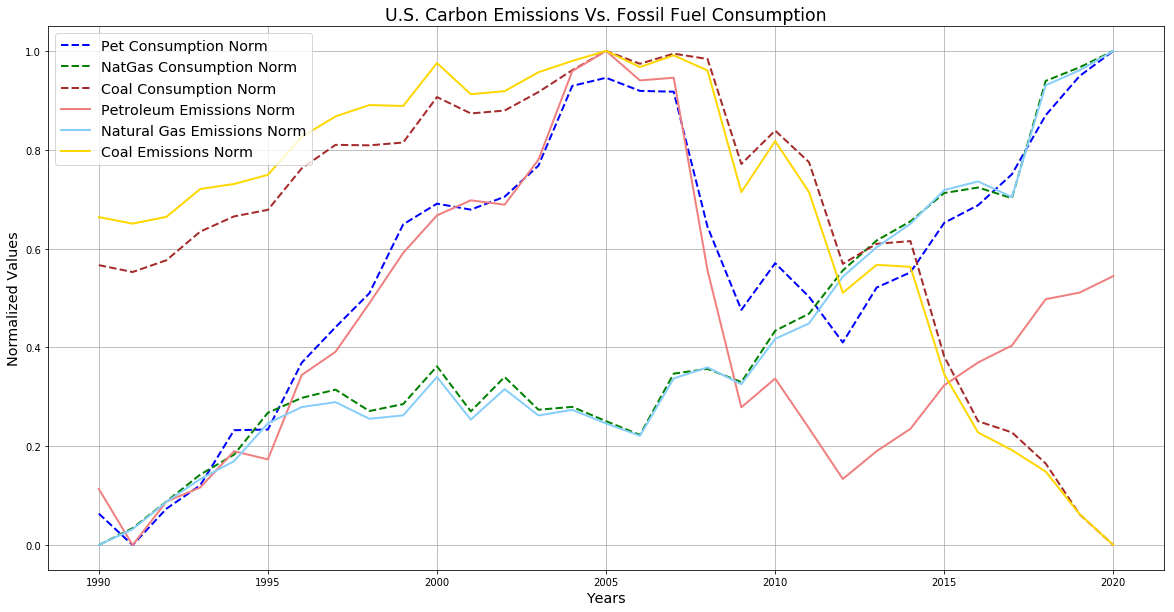

In [30]:
# US Fossil Fuel Consumption (1990 - Present)
plt.figure(figsize=(20,10))

# # Create a visual for the combined normalized consumption and emissions
plt.plot(j_ss['Year'], j_ss['Pet Consumption Norm'], color= "blue", linewidth=2.0, linestyle = '--')
plt.plot(j_ss['Year'], j_ss['NatGas Consumption Norm'], color ="green", linewidth=2.0, linestyle = '--')
plt.plot(j_ss['Year'], j_ss['Coal Consumption Norm'], color="brown", linewidth=2.0, linestyle = '--')
plt.plot(j_ss['Year'], j_ss['Petroleum Emissions Norm'], color="lightcoral", linewidth=2.0)
plt.plot(j_ss['Year'], j_ss['Natural Gas Emissions Norm'], color="lightskyblue", linewidth=2.0)
plt.plot(j_ss['Year'], j_ss['Coal Emissions Norm'], color="gold", linewidth=2.0)
plt.title("U.S. Carbon Emissions Vs. Fossil Fuel Consumption", fontsize="xx-large")
plt.ylabel("Normalized Values", fontsize="x-large")
plt.xlabel("Years", fontsize="x-large")
plt.legend(loc='best', frameon=True, fancybox=True, fontsize="x-large")
plt.grid(True)

#save figure as a png
plt.savefig("output/emissions_consumption.png")

# display the figure
plt.show()

In [31]:
# US Consumption of Conventional Hydroelectric Power Energy by All Sectors, Annual
hydroelectric_url = "http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.HVTCBUS.A"

response = requests.get(hydroelectric_url).json()

# Create lists to determine x and y axis for graphs
years = []
hydroelectric_consumption = []

# Loop through Hydroelectric data API to call data being measured
for x in response["series"][0]["data"]:
    years.append(x[0])
    hydroelectric_consumption.append(x[1])
    
#values = response["series"][0]["data"][1]
years  = years[::-1]
hydroelectric = hydroelectric_consumption[::-1]

# Make a Dataframe for hydro consumption
hydroelectric_consumption_btu_df = pd.DataFrame({
    'Years': years[0:31],
    'Hydroelectric': hydroelectric_consumption[0:31],
})
hydroelectric_consumption_btu_df.head()

,Years,Hydroelectric
0,1990,2.601386
1,1991,2.461102
2,1992,2.675358
3,1993,2.766969
4,1994,2.472442


In [32]:
# US Consumption of Geothermal Energy by All Sectors, Annual
geothermal_url = "http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.GETCBUS.A"

response = requests.get(geothermal_url).json()

# US Consumption of Geothermal Energy by All Sectors, Annual
# Create lists to determine x and y axis for graphs
years = []
geothermal_consumption = []

# Loop through Geothermal API to call data being measured
for x in response["series"][0]["data"]:
    years.append(x[0])
    geothermal_consumption.append(x[1])
    
#values = response["series"][0]["data"][1]
years  = years[::-1]
geothermal = geothermal_consumption[::-1]

# Make dataframe for geothermal consumption
geothermal_consumption_btu_df = pd.DataFrame({
    'Years': years[0:31],
    'Geothermal (Quads)': geothermal_consumption[0:31]
})
geothermal_consumption_btu_df.head()

,Years,Geothermal (Quads)
0,1990,0.231220
1,1991,0.229400
2,1992,0.218939
3,1993,0.210233
4,1994,0.209604


In [33]:
# Electric Power Sector Large-Scale Solar Net Summer Capacity, Annual
solar_url = "http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.SOTCBUS.A"

response = requests.get(solar_url).json()

# Electric Power Sector Large-Scale Solar Net Summer Capacity, Annual
# Create lists to determine x and y axis for graphs
years = []
solar_consumption = []

# Loop through Solar API to call data being measured
for x in response["series"][0]["data"]:
    years.append(x[0])
    solar_consumption.append(x[1])
    
#values = response["series"][0]["data"][1]
years  = years[::-1]
solar = solar_consumption[::-1]

# Determine year to year percent change
solar_consumption_btu_df = pd.DataFrame({
    'Years': years[0:31],
    'Solar (Quads)': solar_consumption[0:31]
})
solar_consumption_btu_df.head()

,Years,Solar (Quads)
0,1990,1.273658
1,1991,1.077747
2,1992,0.955601
3,1993,0.774466
4,1994,0.568665


In [34]:
# Electric Power Sector Large-Scale Wind Net Summer Capacity, Annual
wind_url = "http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.WNTCBUS.A"

response = requests.get(wind_url).json()

# Electric Power Sector Large-Scale Solar Net Summer Capacity, Annual
# Create lists to determine x and y axis for graphs
years = []
wind_consumption = []

# Loop through Solar API to call data being measured
for x in response["series"][0]["data"]:
    years.append(x[0])
    wind_consumption.append(x[1])
    
#values = response["series"][0]["data"][1]
years  = years[::-1]
wind = wind_consumption[::-1]

# Determine year to year percent change
wind_consumption_btu_df = pd.DataFrame({
    'Years': years[0:31],
    'Wind (Quads)': wind_consumption[0:31]
})
wind_consumption_btu_df.head()

,Years,Wind (Quads)
0,1990,3.253554
1,1991,2.891694
2,1992,2.546014
3,1993,2.345611
4,1994,2.093728


In [35]:
# Create Renewable Consumption DataFrame using list of dictionaries method
renewable_consumption_btu_df = pd.DataFrame({
    'Year': years[0:31],
    'Hydroelectric': hydroelectric[0:31],
    'Wind': wind[0:31],
    'Solar': solar[0:31],
    'Geothermal': geothermal[0:31],
})

# Normalize values for the different types of renewable consumption
z = renewable_consumption_btu_df[['Hydroelectric','Wind', 'Solar', 'Geothermal', "Year"]].values.astype(float) #returns a numpy array
r_y= pd.DataFrame(z)
z = renewable_consumption_btu_df[['Hydroelectric','Wind', 'Solar', 'Geothermal']].values.astype(float)

r_min_max_scaler = preprocessing.MinMaxScaler()
z_scaled = r_min_max_scaler.fit_transform(z)
renewable_consumption_normdf = pd.DataFrame(z_scaled, columns=['HydroNorm', 'WindNorm', 'SolarNorm', 'GeoNorm'])

r_ss= renewable_consumption_normdf.join(r_y)

# drop extra columns
r_ss=r_ss.drop([0, 1, 2, 3], axis=1)

# rename year index in dataframe to 'Year'
r_ss=r_ss.rename(columns = {4: "Year"})

# change year to integer for merge 
r_ss["Year"] = r_ss.Year.astype(int)

#make dataframe
r_ss=pd.DataFrame(r_ss)

# merge normalized consumption dataframe with emissions dataframe
r_emissions_consumption_df = pd.merge(emissions_df , r_ss , on='Year', how='inner')

# normalize all values in merged dataframe
r_xx=r_emissions_consumption_df[['Natural Gas Emissions','Petroleum Emissions', 'Coal Emissions', 'HydroNorm', 'WindNorm', 'SolarNorm', 'GeoNorm', "Year"]].values.astype(float) #returns a numpy array
r_yy= pd.DataFrame(r_xx)
r_xx = r_emissions_consumption_df[['Natural Gas Emissions','Petroleum Emissions', 'Coal Emissions', 'HydroNorm', 'WindNorm', 'SolarNorm', 'GeoNorm']].values.astype(float)

r_j_min_max_scaler = preprocessing.MinMaxScaler()
r_xx_scaled = r_j_min_max_scaler.fit_transform(r_xx)
r_emissions_consumption_normdf = pd.DataFrame(r_xx_scaled, columns=['Natural Gas Emissions Norm', 'Petroleum Emissions Norm', 'Coal Emissions Norm', 'Hydro Consumption Norm', 'Wind Consumption Norm', 'Solar Consumption Norm' , 'Geo Consumption Norm'])

r_j_ss= r_emissions_consumption_normdf.join(r_yy)

# drop unneccessary columns
r_j_ss=r_j_ss.drop([0, 1, 2, 3, 4, 5, 6], axis=1)

# rename year index as 'year'
r_j_ss=r_j_ss.rename(columns = {7: "Year"})

# change year column to integer
r_j_ss["Year"] = r_j_ss.Year.astype(int)

# make a dataframe
r_j_ss=pd.DataFrame(r_j_ss)

r_j_ss.head()

,Natural Gas Emissions Norm,Petroleum Emissions Norm,Coal Emissions Norm,Hydro Consumption Norm,Wind Consumption Norm,Solar Consumption Norm,Geo Consumption Norm,Year
0,0.000000,0.113537,0.663712,0.575241,0.000000,0.000000,0.236104,1990
1,0.032192,0.000000,0.650515,0.553472,0.000555,0.002416,0.322994,1991
2,0.087526,0.088057,0.664195,0.268538,0.000265,0.003505,0.336549,1992
3,0.133608,0.116652,0.720626,0.464575,0.000614,0.005468,0.424652,1993
4,0.169815,0.190021,0.730724,0.315744,0.002032,0.007150,0.270418,1994


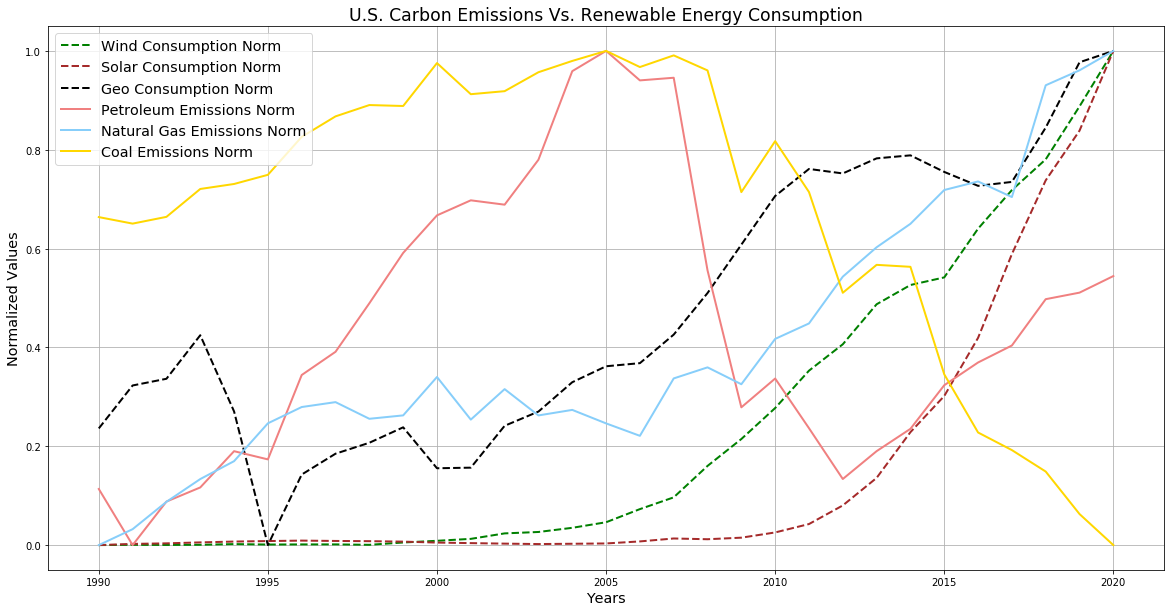

In [36]:
# US Fossil Fuel Consumption (1990 - Present)
plt.figure(figsize=(20,10))

# # Create a visual for the combined normalized consumption and emissions
#plt.plot(r_j_ss['Year'], r_j_ss['Hydro Consumption Norm'], color= "blue", linewidth=2.0, linestyle = '--')
plt.plot(r_j_ss['Year'], r_j_ss['Wind Consumption Norm'], color ="green", linewidth=2.0, linestyle = '--')
plt.plot(r_j_ss['Year'], r_j_ss['Solar Consumption Norm'], color="brown", linewidth=2.0, linestyle = '--')
plt.plot(r_j_ss['Year'], r_j_ss['Geo Consumption Norm'], color="black", linewidth=2.0, linestyle = '--')
plt.plot(r_j_ss['Year'], r_j_ss['Petroleum Emissions Norm'], color="lightcoral", linewidth=2.0)
plt.plot(r_j_ss['Year'], r_j_ss['Natural Gas Emissions Norm'], color="lightskyblue", linewidth=2.0)
plt.plot(r_j_ss['Year'], r_j_ss['Coal Emissions Norm'], color="gold", linewidth=2.0)
plt.title("U.S. Carbon Emissions Vs. Renewable Energy Consumption", fontsize="xx-large")
plt.ylabel("Normalized Values", fontsize="x-large")
plt.xlabel("Years", fontsize="x-large")
plt.legend(loc='best', frameon=True, fancybox=True, fontsize="x-large")
plt.grid(True)

#save figure as a png
plt.savefig("output/emissions_renewable_consumption.png")

# display the figure
plt.show()